In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Update the file path if needed)
file_path = "/Users/mariasanchez/Downloads/USW00012921.csv"  
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,AWND,AWND_ATTRIBUTES,CDSD,CDSD_ATTRIBUTES,...,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES
0,USW00012921,1946,29.54429,-98.48395,243.6,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00012921,1947,29.54429,-98.48395,243.6,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",NaN,NaN,1709.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00012921,1948,29.54429,-98.48395,243.6,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",NaN,NaN,1800.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00012921,1949,29.54429,-98.48395,243.6,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",NaN,NaN,1619.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00012921,1950,29.54429,-98.48395,243.6,"SAN ANTONIO INTERNATIONAL AIRPORT, TX US",NaN,NaN,1644.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Select relevant columns
columns = ["DATE", "TMAX", "TMIN", "TAVG", "PRCP"]  # Max temp, Min temp, Avg temp, Precipitation
df_filtered = df[columns]

# Convert DATE to datetime format
df_filtered["DATE"] = pd.to_datetime(df_filtered["DATE"], format="%Y")

# Drop rows with missing values
df_filtered = df_filtered.dropna()

# Display cleaned data
df_filtered.head()


/var/folders/rj/lwc3hbqn4cg27kn305h1_55m0000gn/T/ipykernel_57190/2732137661.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["DATE"] = pd.to_datetime(df_filtered["DATE"], format="%Y")


,DATE,TMAX,TMIN,TAVG,PRCP
1,1947-01-01,26.57,13.36,19.96,440.6
2,1948-01-01,27.22,13.72,20.47,601.4
3,1949-01-01,26.20,14.73,20.46,1037.1
4,1950-01-01,26.87,14.60,20.73,505.6
5,1951-01-01,27.30,14.34,20.82,621.1


In [13]:
# Compute averages
average_temp = df_filtered["TAVG"].mean()
average_precip = df_filtered["PRCP"].mean()

print(f"📌 Average Temperature in San Antonio: {average_temp:.2f}°C")
print(f"📌 Average Precipitation in San Antonio: {average_precip:.2f} inches")


📌 Average Temperature in San Antonio: 20.80°C
📌 Average Precipitation in San Antonio: 765.69 inches


In [11]:
# Check temperature statistics
print(df_filtered[["TMAX", "TMIN", "TAVG"]].describe())


            TMAX       TMIN       TAVG
count  78.000000  78.000000  78.000000
mean   26.831923  14.777308  20.804487
std     0.931725   0.776694   0.788149
min    24.950000  13.070000  19.090000
25%    26.175000  14.285000  20.260000
50%    26.820000  14.690000  20.800000
75%    27.390000  15.352500  21.285000
max    28.900000  17.100000  22.910000


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


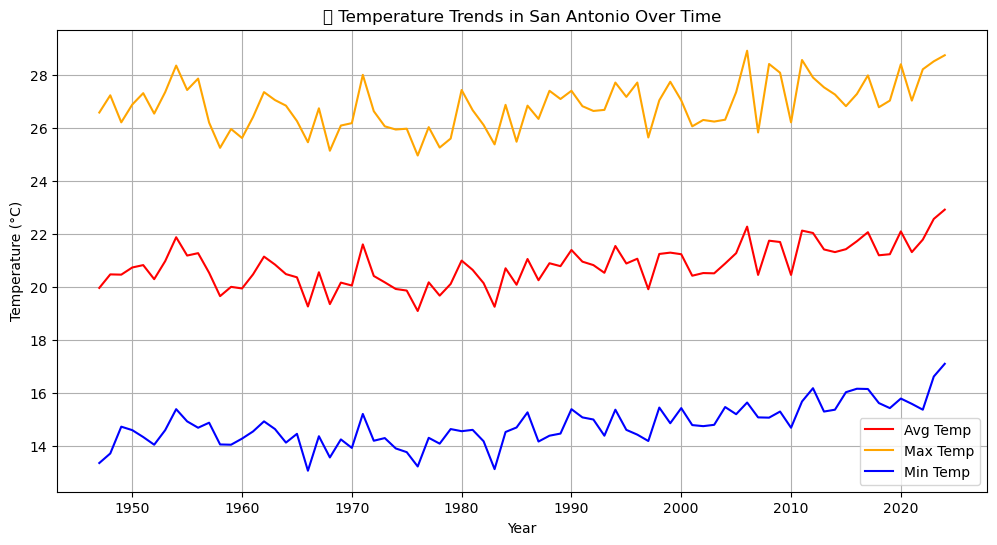

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filtered["DATE"], y=df_filtered["TAVG"], label="Avg Temp", color="red")
sns.lineplot(x=df_filtered["DATE"], y=df_filtered["TMAX"], label="Max Temp", color="orange")
sns.lineplot(x=df_filtered["DATE"], y=df_filtered["TMIN"], label="Min Temp", color="blue")

plt.title("📊 Temperature Trends in San Antonio Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


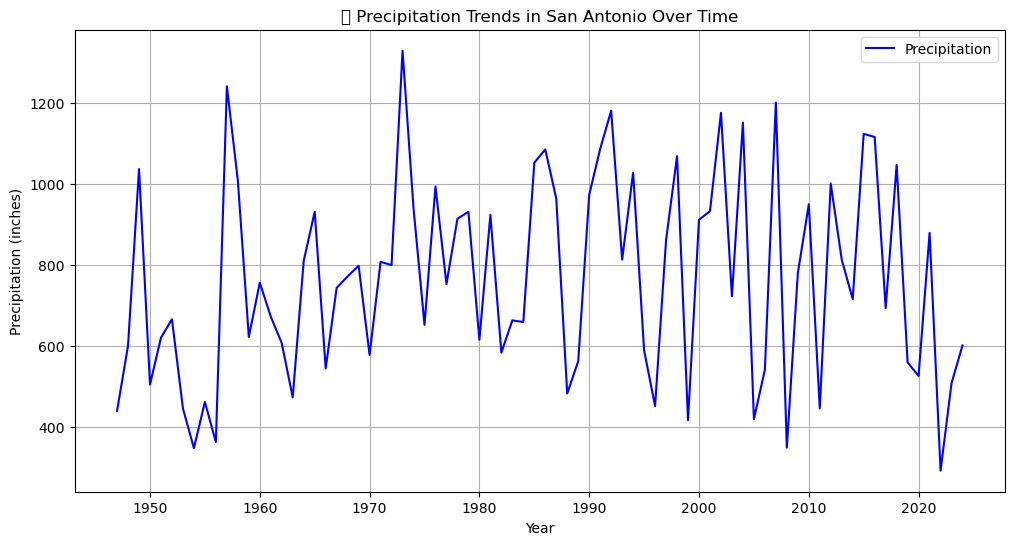

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filtered["DATE"], y=df_filtered["PRCP"], label="Precipitation", color="blue")

plt.title("📊 Precipitation Trends in San Antonio Over Time")
plt.xlabel("Year")
plt.ylabel("Precipitation (inches)")
plt.legend()
plt.grid()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


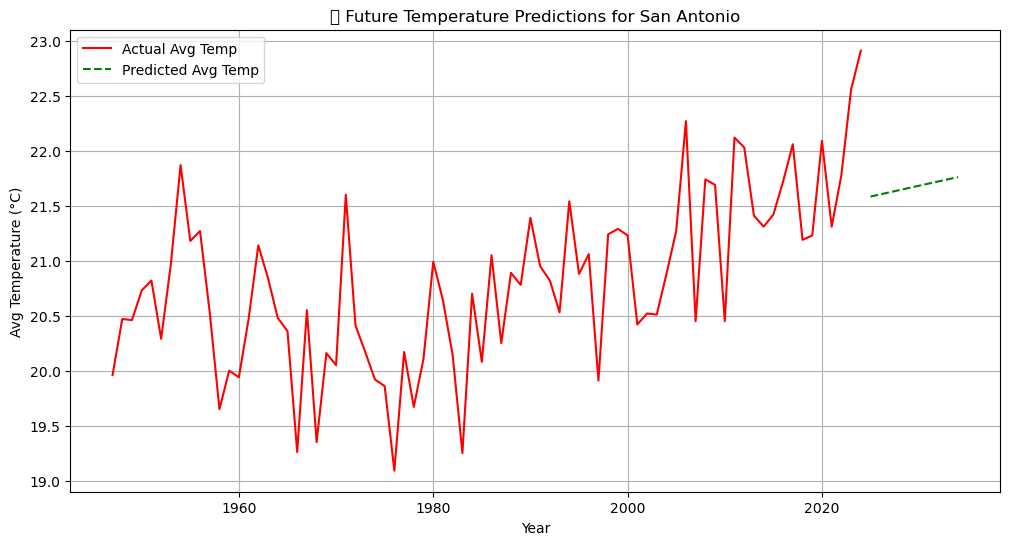

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for model
df_filtered["Year"] = df_filtered["DATE"].dt.year
X = df_filtered[["Year"]]
y = df_filtered["TAVG"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict next 10 years
future_years = np.arange(df_filtered["Year"].max() + 1, df_filtered["Year"].max() + 11).reshape(-1, 1)
future_temps = model.predict(future_years)

# Plot future predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filtered["Year"], y=df_filtered["TAVG"], label="Actual Avg Temp", color="red")
plt.plot(future_years, future_temps, label="Predicted Avg Temp", linestyle="--", color="green")

plt.title("📊 Future Temperature Predictions for San Antonio")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.legend()
plt.grid()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


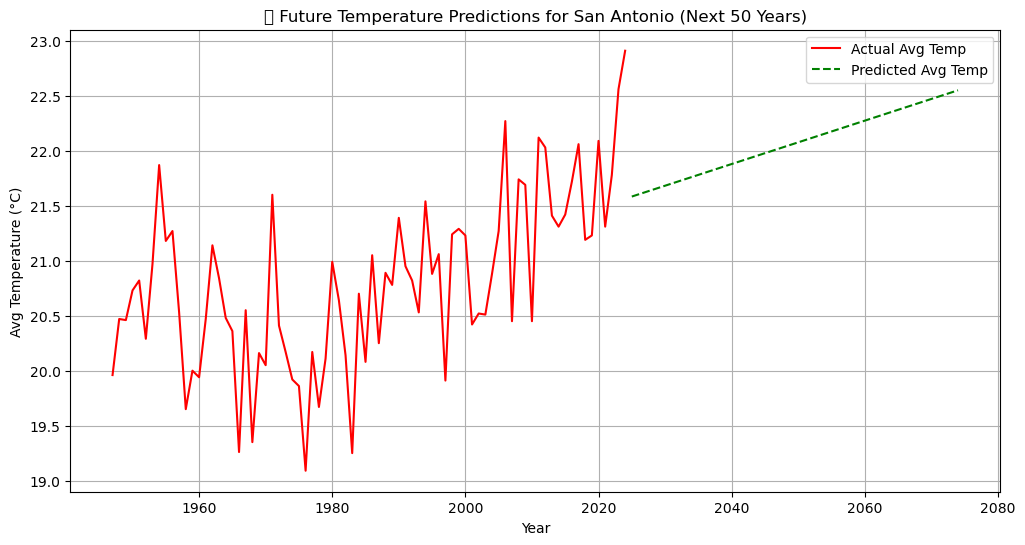

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Year' column is extracted correctly
df_filtered["Year"] = df_filtered["DATE"].dt.year

# Prepare data for linear regression model
X = df_filtered[["Year"]]
y = df_filtered["TAVG"]

# Train the model
model = LinearRegression()
model.fit(X, y)

# Extend predictions for the next 50 years (to 2075)
future_years = np.arange(df_filtered["Year"].max() + 1, df_filtered["Year"].max() + 51).reshape(-1, 1)
future_temps = model.predict(future_years)

# Plot historical and future temperature trends
plt.figure(figsize=(12, 6))

# Plot actual temperatures
sns.lineplot(x=df_filtered["Year"], y=df_filtered["TAVG"], label="Actual Avg Temp", color="red")

# Plot future predictions
plt.plot(future_years, future_temps, label="Predicted Avg Temp", linestyle="--", color="green")

# Add labels, title, and legend
plt.title("🌡️ Future Temperature Predictions for San Antonio (Next 50 Years)")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.legend()
plt.grid()

# Show the plot
plt.show()


The predicted line slopes upwards, meaning San Antonio is getting hotter.By 2075, the avg temperature could be higher than ever.